In [ ]:
import pandas as pd
import numpy as np
import string
import re 

In [ ]:
#from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split

In [ ]:
#import seaborn as sns
#import matplotlib.pyplot as plt
#%matplotlib inline 

In [ ]:
import time

In [ ]:
#from sklearn.metrics import  classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
desp_data=pd.read_csv('/content/drive/MyDrive/word2vector/sentiment_tweets3.csv')

In [ ]:
desp_data.shape

(10314, 3)

In [ ]:
desp_data.columns

Index(['Unnamed: 0', 'message', 'label'], dtype='object')

In [ ]:
desp_data

,Unnamed: 0,message,label
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1
10310,802310,What do you do when depression succumbs the br...,1
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,802312,dont mistake a bad day with depression! everyo...,1


In [ ]:
DespNo=desp_data[desp_data.label==0]  #label0 datas into DespNo
DespYes=desp_data[desp_data.label==1] #label1 datas into DespYes

In [ ]:
DespNo.head()

,Unnamed: 0,message,label
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [ ]:
DespYes.head()

,Unnamed: 0,message,label
8000,800000,The lack of this understanding is a small but ...,1
8001,800001,i just told my parents about my depression and...,1
8002,800002,depression is something i don't speak about ev...,1
8003,800003,Made myself a tortilla filled with pb&j. My de...,1
8004,800004,@WorldofOutlaws I am gonna need depression med...,1


In [ ]:
desp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10314 non-null  int64 
 1   message     10314 non-null  object
 2   label       10314 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 241.9+ KB


In [ ]:
desp_data.sample(10)

,Unnamed: 0,message,label
2671,273697,@eve76 Yay! *scarfs blizzard* thank you what!...,0
5768,576410,@Pinkis4gangstas I'm pretty sure they are amaz...,0
7236,722705,Goodnight world i will open my eyes at 8:30a....,0
753,78389,@mambaMVP24 lmao I told him that me and my Lak...,0
136,14890,"Relaxing before guests come, hope everyone lik...",0
5300,527784,feeding fish is fun http://bit.ly/19n8w4,0
9798,801798,BTS saved me from committing suicide.I hv neve...,1
5067,506755,@MyManJBone I'll try,0
6122,609412,@hlbllygrl your kidding it's saturday!?! that...,0
3689,373480,@i_stacey wish that I cld stay in bed but ther...,0


In [ ]:
desp_data=desp_data.dropna()  #drop all rows with nullvalues(na)

In [ ]:
desp_duplicate=desp_data[desp_data.duplicated()]
print(desp_duplicate)

Empty DataFrame
Columns: [Unnamed: 0, message, label]
Index: []


In [ ]:
desp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10314 entries, 0 to 10313
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10314 non-null  int64 
 1   message     10314 non-null  object
 2   label       10314 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 322.3+ KB


In [ ]:
desp_data['message']=desp_data['message'].str.lower() #to lower case
desp_data['message']

0        just had a real good moment. i missssssssss hi...
1               is reading manga  http://plurk.com/p/mzp1e
2        @comeagainjen http://twitpic.com/2y2lx - http:...
3        @lapcat need to send 'em to my accountant tomo...
4            add me on myspace!!!  myspace.com/lookthunder
                               ...                        
10309    no depression by g herbo is my mood from now o...
10310    what do you do when depression succumbs the br...
10311    ketamine nasal spray shows promise against dep...
10312    dont mistake a bad day with depression! everyo...
10313                                                    0
Name: message, Length: 10314, dtype: object

In [ ]:
desp_data['message']

0        just had a real good moment. i missssssssss hi...
1               is reading manga  http://plurk.com/p/mzp1e
2        @comeagainjen http://twitpic.com/2y2lx - http:...
3        @lapcat need to send 'em to my accountant tomo...
4            add me on myspace!!!  myspace.com/lookthunder
                               ...                        
10309    no depression by g herbo is my mood from now o...
10310    what do you do when depression succumbs the br...
10311    ketamine nasal spray shows promise against dep...
10312    dont mistake a bad day with depression! everyo...
10313                                                    0
Name: message, Length: 10314, dtype: object

In [ ]:
def cleaning_URLs(data): #cleaning urls
    return re.sub('((www.[^s]+)|(https?://[^s]+))','',data)
desp_data['message'] = desp_data['message'].apply(lambda x: cleaning_URLs(x))
desp_data['message']

0        just had a real good moment. i missssssssss hi...
1                                       is reading manga  
2                                           @comeagainjen 
3        @lapcat need to send 'em to my accountant tomo...
4            add me on myspace!!!  myspace.com/lookthunder
                               ...                        
10309    no depression by g herbo is my mood from now o...
10310    what do you do when depression succumbs the br...
10311    ketamine nasal spray shows promise against dep...
10312    dont mistake a bad day with depression! everyo...
10313                                                    0
Name: message, Length: 10314, dtype: object

In [ ]:
desp_data['message']

0        just had a real good moment. i missssssssss hi...
1                                       is reading manga  
2                                           @comeagainjen 
3        @lapcat need to send 'em to my accountant tomo...
4            add me on myspace!!!  myspace.com/lookthunder
                               ...                        
10309    no depression by g herbo is my mood from now o...
10310    what do you do when depression succumbs the br...
10311    ketamine nasal spray shows promise against dep...
10312    dont mistake a bad day with depression! everyo...
10313                                                    0
Name: message, Length: 10314, dtype: object

In [ ]:
def cleaning_Usrname(userndata): #cleaning username
    return re.sub('@[^\s]+','',userndata)
desp_data['message'] = desp_data['message'].apply(lambda x: cleaning_Usrname(x))

In [ ]:
def cleaning_numbers(data):
     return re.sub('[0-9]+', '', data)
desp_data['message'] = desp_data['message'].apply(lambda x: cleaning_numbers(x))
desp_data['message']

0        just had a real good moment. i missssssssss hi...
1                                       is reading manga  
2                                                         
3         need to send 'em to my accountant tomorrow. o...
4            add me on myspace!!!  myspace.com/lookthunder
                               ...                        
10309    no depression by g herbo is my mood from now o...
10310    what do you do when depression succumbs the br...
10311    ketamine nasal spray shows promise against dep...
10312    dont mistake a bad day with depression! everyo...
10313                                                     
Name: message, Length: 10314, dtype: object

In [ ]:
desp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10314 entries, 0 to 10313
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10314 non-null  int64 
 1   message     10314 non-null  object
 2   label       10314 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 322.3+ KB


In [ ]:
desp_data

,Unnamed: 0,message,label
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga,0
2,220,,0
3,288,need to send 'em to my accountant tomorrow. o...,0
4,540,add me on myspace!!! myspace.com/lookthunder,0
...,...,...,...
10309,802309,no depression by g herbo is my mood from now o...,1
10310,802310,what do you do when depression succumbs the br...,1
10311,802311,ketamine nasal spray shows promise against dep...,1
10312,802312,dont mistake a bad day with depression! everyo...,1


In [ ]:
desp_data["message"].notnull()

0        True
1        True
2        True
3        True
4        True
         ... 
10309    True
10310    True
10311    True
10312    True
10313    True
Name: message, Length: 10314, dtype: bool

In [ ]:
desp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10314 entries, 0 to 10313
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10314 non-null  int64 
 1   message     10314 non-null  object
 2   label       10314 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 322.3+ KB


In [ ]:
desp_data = desp_data.reset_index(drop=True)
desp_data

,Unnamed: 0,message,label
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga,0
2,220,,0
3,288,need to send 'em to my accountant tomorrow. o...,0
4,540,add me on myspace!!! myspace.com/lookthunder,0
...,...,...,...
10309,802309,no depression by g herbo is my mood from now o...,1
10310,802310,what do you do when depression succumbs the br...,1
10311,802311,ketamine nasal spray shows promise against dep...,1
10312,802312,dont mistake a bad day with depression! everyo...,1


In [ ]:
data=desp_data.dropna()
data

,Unnamed: 0,message,label
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga,0
2,220,,0
3,288,need to send 'em to my accountant tomorrow. o...,0
4,540,add me on myspace!!! myspace.com/lookthunder,0
...,...,...,...
10309,802309,no depression by g herbo is my mood from now o...,1
10310,802310,what do you do when depression succumbs the br...,1
10311,802311,ketamine nasal spray shows promise against dep...,1
10312,802312,dont mistake a bad day with depression! everyo...,1


In [ ]:
x=desp_data["message"]
print(x)
print(type(x))
y=desp_data["label"]
print(y)

0        just had a real good moment. i missssssssss hi...
1                                       is reading manga  
2                                                         
3         need to send 'em to my accountant tomorrow. o...
4            add me on myspace!!!  myspace.com/lookthunder
                               ...                        
10309    no depression by g herbo is my mood from now o...
10310    what do you do when depression succumbs the br...
10311    ketamine nasal spray shows promise against dep...
10312    dont mistake a bad day with depression! everyo...
10313                                                     
Name: message, Length: 10314, dtype: object
<class 'pandas.core.series.Series'>
0        0
1        0
2        0
3        0
4        0
        ..
10309    1
10310    1
10311    1
10312    1
10313    1
Name: label, Length: 10314, dtype: int64


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
def lemmatize(df): #lemmitization function
    res=[]
    count=df.shape[0]
    
    for row in df:
        doc=nlp(row)
        row=" ".join([w.lemma_ for w in nlp(row)])
        res.append(row)
        count=count-1
        
        if(count%5000==0):
            print("Remaining no. of rows= ",count)
            
    res=pd.Series(res)
    return res

In [ ]:
lemmatized_x=lemmatize(x)

Remaining no. of rows=  10000
Remaining no. of rows=  5000
Remaining no. of rows=  0


In [ ]:
lemmatized_x.head()

0    just have a real good moment . I missssssssss ...
1                                      be read manga  
2                                                     
3      need to send them to my accountant tomorrow ...
4     add I on myspace ! ! !   myspace.com/lookthunder
dtype: object

In [ ]:
def clean_text(redata):#refunction for removing unwanter symbols,data
    res=[]
    for row in redata:
        text = re.sub(r'[^(a-zA-Z)\s]','', row)
        res.append(text)
    res=pd.Series(res)
    return res

In [ ]:
recleaned_x=clean_text(lemmatized_x)#calling refunction
recleaned_x.head()

0    just have a real good moment  I missssssssss h...
1                                      be read manga  
2                                                     
3      need to send them to my accountant tomorrow ...
4          add I on myspace      myspacecomlookthunder
dtype: object

In [ ]:
x.head()

0    just had a real good moment. i missssssssss hi...
1                                   is reading manga  
2                                                     
3     need to send 'em to my accountant tomorrow. o...
4        add me on myspace!!!  myspace.com/lookthunder
Name: message, dtype: object

In [ ]:
recleaned_x.to_csv("Xfulldataset.csv",index=False)

In [ ]:
dataset=pd.concat([recleaned_x,y],axis=1)
dataset

,0,label
0,just have a real good moment I missssssssss h...,0
1,be read manga,0
2,,0
3,need to send them to my accountant tomorrow ...,0
4,add I on myspace myspacecomlookthunder,0
...,...,...
10309,no depression by g herbo be my mood from now o...,1
10310,what do you do when depression succumb the bra...,1
10311,ketamine nasal spray show promise against depr...,1
10312,do not mistake a bad day with depression ever...,1


In [ ]:
dataset.columns = ["Message", "Label"]

In [ ]:
dataset = dataset.dropna()
dataset

,Message,Label
0,just have a real good moment I missssssssss h...,0
1,be read manga,0
2,,0
3,need to send them to my accountant tomorrow ...,0
4,add I on myspace myspacecomlookthunder,0
...,...,...
10309,no depression by g herbo be my mood from now o...,1
10310,what do you do when depression succumb the bra...,1
10311,ketamine nasal spray show promise against depr...,1
10312,do not mistake a bad day with depression ever...,1


In [ ]:
dataset.to_csv("cleaned-dataset.csv",index=False)

In [ ]:
#tokenizing
tokenizer=RegexpTokenizer(r'[A-Za-z]+')
dataset['Message'] = dataset['Message'].apply(tokenizer.tokenize)
dataset['Message']

0        [just, have, a, real, good, moment, I, misssss...
1                                        [be, read, manga]
2                                                       []
3        [need, to, send, them, to, my, accountant, tom...
4             [add, I, on, myspace, myspacecomlookthunder]
                               ...                        
10309    [no, depression, by, g, herbo, be, my, mood, f...
10310    [what, do, you, do, when, depression, succumb,...
10311    [ketamine, nasal, spray, show, promise, agains...
10312    [do, not, mistake, a, bad, day, with, depressi...
10313                                                   []
Name: Message, Length: 10314, dtype: object

In [ ]:
dataset

,Message,Label
0,"[just, have, a, real, good, moment, I, misssss...",0
1,"[be, read, manga]",0
2,[],0
3,"[need, to, send, them, to, my, accountant, tom...",0
4,"[add, I, on, myspace, myspacecomlookthunder]",0
...,...,...
10309,"[no, depression, by, g, herbo, be, my, mood, f...",1
10310,"[what, do, you, do, when, depression, succumb,...",1
10311,"[ketamine, nasal, spray, show, promise, agains...",1
10312,"[do, not, mistake, a, bad, day, with, depressi...",1


In [ ]:
X=dataset.Message
Y=dataset.Label

In [ ]:
print(X)
print(Y)

0        [just, have, a, real, good, moment, I, misssss...
1                                        [be, read, manga]
2                                                       []
3        [need, to, send, them, to, my, accountant, tom...
4             [add, I, on, myspace, myspacecomlookthunder]
                               ...                        
10309    [no, depression, by, g, herbo, be, my, mood, f...
10310    [what, do, you, do, when, depression, succumb,...
10311    [ketamine, nasal, spray, show, promise, agains...
10312    [do, not, mistake, a, bad, day, with, depressi...
10313                                                   []
Name: Message, Length: 10314, dtype: object
0        0
1        0
2        0
3        0
4        0
        ..
10309    1
10310    1
10311    1
10312    1
10313    1
Name: Label, Length: 10314, dtype: int64


In [ ]:
for i in range(len(X)):
  X[i]=" ".join(X[i])
dataset["Message"]=X
dataset

,Message,Label
0,just have a real good moment I missssssssss he...,0
1,be read manga,0
2,,0
3,need to send them to my accountant tomorrow od...,0
4,add I on myspace myspacecomlookthunder,0
...,...,...
10309,no depression by g herbo be my mood from now o...,1
10310,what do you do when depression succumb the bra...,1
10311,ketamine nasal spray show promise against depr...,1
10312,do not mistake a bad day with depression every...,1


In [ ]:
dataset['Label'].value_counts()

0    8000
1    2314
Name: Label, dtype: int64

In [ ]:
yes=dataset[dataset["Label"]==1]
no=dataset[dataset["Label"]==0]

In [ ]:
yes

,Message,Label
8000,the lack of this understanding be a small but ...,1
8001,I just tell my parent about my depression and ...,1
8002,depression be something I do not speak about e...,1
8003,make myself a tortilla fill with pbj my depres...,1
8004,I be go to need depression med soon these rain...,1
...,...,...
10309,no depression by g herbo be my mood from now o...,1
10310,what do you do when depression succumb the bra...,1
10311,ketamine nasal spray show promise against depr...,1
10312,do not mistake a bad day with depression every...,1


In [ ]:
no

,Message,Label
0,just have a real good moment I missssssssss he...,0
1,be read manga,0
2,,0
3,need to send them to my accountant tomorrow od...,0
4,add I on myspace myspacecomlookthunder,0
...,...,...
7995,quotwow what a tight fitquot lmao shutup,0
7996,do not know what you could possibly mean dear boy,0
7997,love the cameo make I chuckle along with your ...,0
7998,lol I just realize my room have a color theme ...,0


In [ ]:
n=len(no)

In [ ]:
print(n)

8000


In [ ]:
YES=yes.sample(n,replace=True)

In [ ]:
YES.shape

(8000, 2)

In [ ]:
no.shape

(8000, 2)

In [ ]:
DT=pd.concat([YES,no],axis=0)

In [ ]:
DT.head()

,Message,Label
8958,agree I be bully relentlessly after I come out...,1
9537,liter of water a daykeep your depression awayweh,1
8060,well what an absolutely shit day sick of my li...,1
9098,I love a good depression nap,1
8502,when you have a good day but the depression ki...,1


In [ ]:
dataset.head()

,Message,Label
0,just have a real good moment I missssssssss he...,0
1,be read manga,0
2,,0
3,need to send them to my accountant tomorrow od...,0
4,add I on myspace myspacecomlookthunder,0


In [ ]:
DT.reset_index(inplace=True,drop=True)

In [ ]:
DTT=DT

In [ ]:
DT

,Message,Label
0,agree I be bully relentlessly after I come out...,1
1,liter of water a daykeep your depression awayweh,1
2,well what an absolutely shit day sick of my li...,1
3,I love a good depression nap,1
4,when you have a good day but the depression ki...,1
...,...,...
15995,quotwow what a tight fitquot lmao shutup,0
15996,do not know what you could possibly mean dear boy,0
15997,love the cameo make I chuckle along with your ...,0
15998,lol I just realize my room have a color theme ...,0


In [ ]:
DTT

,Message,Label
0,agree I be bully relentlessly after I come out...,1
1,liter of water a daykeep your depression awayweh,1
2,well what an absolutely shit day sick of my li...,1
3,I love a good depression nap,1
4,when you have a good day but the depression ki...,1
...,...,...
15995,quotwow what a tight fitquot lmao shutup,0
15996,do not know what you could possibly mean dear boy,0
15997,love the cameo make I chuckle along with your ...,0
15998,lol I just realize my room have a color theme ...,0


In [ ]:
#trying word to vect (glove)
!wget --header 'Host: downloads.cs.stanford.edu' --user-agent 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:100.0) Gecko/20100101 Firefox/100.0' --header 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8' --header 'Accept-Language: en-US,en;q=0.5' --referer 'https://colab.research.google.com/' --header 'DNT: 1' --header 'Upgrade-Insecure-Requests: 1' 'http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip' --output-document 'glove.6B.zip'


--2022-11-19 05:44:27--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.15MB/s    in 2m 40s  

2022-11-19 05:47:07 (5.15 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [ ]:
!unzip /content/glove.6B.zip

In [ ]:
import os

In [ ]:
# Create Empty dictionary
word2vector = {}
#Create a dictionary with word and corresponding vector
with open(os.path.join('/content/drive/MyDrive/word2vector/glove.6B.100d.txt')) as file:
  for line in file:
    list_of_values = line.split()    	
    word = list_of_values[0]
    vector_of_word = np.asarray(list_of_values[1:], dtype='float32')
    word2vector[word] = vector_of_word

In [ ]:
word2vector["the"]

array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
       -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
        0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
       -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
        0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
       -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
        0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
        0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
       -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
       -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
       -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
       -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
       -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
       -1.2526  ,  0.071624,  0.70565 ,  0.49744 , 

In [ ]:
i=0;list_of_sentance=[]
for sentance in DT['Message']:
    list_of_sentance.append(sentance.split())

In [ ]:
list_of_sentance

[['agree',
  'I',
  'be',
  'bully',
  'relentlessly',
  'after',
  'I',
  'come',
  'out',
  'to',
  'the',
  'point',
  'I',
  'have',
  'to',
  'leave',
  'my',
  'secondary',
  'school',
  'to',
  'be',
  'home',
  'school',
  'I',
  'develop',
  'panic',
  'attack',
  'clinical',
  'depression',
  'severe',
  'anxiety',
  'disorder',
  'etc',
  'thing',
  'need',
  'to',
  'change',
  'squeen',
  'status'],
 ['liter', 'of', 'water', 'a', 'daykeep', 'your', 'depression', 'awayweh'],
 ['well',
  'what',
  'an',
  'absolutely',
  'shit',
  'day',
  'sick',
  'of',
  'my',
  'life',
  'take',
  'shot',
  'at',
  'I',
  'every',
  'fucking',
  'day',
  'the',
  'point',
  'of',
  'I',
  'try',
  'be',
  'suppose',
  'to',
  'make',
  'effort',
  'not',
  'dig',
  'I',
  'deeply',
  'into',
  'depression',
  'anger',
  'stresssorry',
  'for',
  'short',
  'crappy',
  'stream',
  'honestly',
  'do',
  'not',
  'know',
  'when',
  'or',
  'if',
  'I',
  'will',
  'be',
  'back',
  'pictwi

In [ ]:
from tqdm import tqdm
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
avg_w2v_vectorss= [];
for sentence in tqdm(list_of_sentance): # for each review/sentence
    vector = np.zeros(100) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence: # for each word in a review/sentence
        try:
            vector += word2vector[word]
            cnt_words += 1
        except:
          continue
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)
    avg_w2v_vectorss=avg_w2v_vectors
print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|██████████| 16000/16000 [00:00<00:00, 18497.47it/s]

16000
100


In [ ]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(avg_w2v_vectors,DT['Label'],test_size = 0.25)

In [ ]:
avg_w2v_vectorss=pd.Series(avg_w2v_vectorss)

In [ ]:
#random_state =26105111

In [ ]:
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

In [ ]:
from sklearn.metrics import classification_report


In [ ]:
def model_Evaluate(model):
    # Predict values for Test dataset
    ypred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, ypred))

In [ ]:
LRmodel = LogisticRegression()
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      2012
           1       0.95      0.96      0.96      1988

    accuracy                           0.96      4000
   macro avg       0.96      0.96      0.96      4000
weighted avg       0.96      0.96      0.96      4000



In [ ]:
LogisticRegression=LRmodel.score(X_test,y_test)
LogisticRegression

0.957

In [ ]:
from sklearn import svm
svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
model_Evaluate(svm_linear)
y_predsvm = svm_linear.predict(X_test)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2012
           1       0.95      0.97      0.96      1988

    accuracy                           0.96      4000
   macro avg       0.96      0.96      0.96      4000
weighted avg       0.96      0.96      0.96      4000



In [ ]:
svm=svm_linear.score(X_test,y_test)
svm

0.95775

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_7 = RandomForestClassifier(n_estimators=3)
model_7.fit(X_train, y_train)

RandomForestClassifier(n_estimators=3)

In [ ]:
model_Evaluate(model_7)


              precision    recall  f1-score   support

           0       0.98      0.95      0.96      2012
           1       0.95      0.98      0.97      1988

    accuracy                           0.97      4000
   macro avg       0.97      0.97      0.97      4000
weighted avg       0.97      0.97      0.97      4000



In [ ]:
y_pred = model_7.predict(X_test)

In [ ]:
Rdf=model_7.score(X_test,y_test)
Rdf

0.96525

In [ ]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from xgboost import XGBClassifier as xgb
import xgboost as xgb
xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(X_train,y_train)
model_Evaluate(xgb_cl)
y_predxgb=xgb_cl.predict(X_test)
xgb=xgb_cl.score(X_test,y_test)
xgb

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2012
           1       0.97      0.98      0.97      1988

    accuracy                           0.97      4000
   macro avg       0.97      0.97      0.97      4000
weighted avg       0.97      0.97      0.97      4000



0.9725

In [ ]:
model_accuracy=pd.DataFrame({
    'Model':['LogisticRegression','SVM','RandomForestClassifier','XGboost'],
    'Score':[LogisticRegression,svm,Rdf,xgb]})
model_accuracy=model_accuracy.sort_values(by='Score',ascending=False)
model_accuracy

,Model,Score
3,XGboost,0.97250
2,RandomForestClassifier,0.96525
1,SVM,0.95775
0,LogisticRegression,0.95700


In [ ]:
from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix

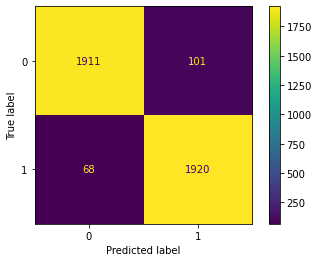

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_predsvm = svm_linear.predict(X_test)
cm = confusion_matrix(y_test, y_predsvm)

cm_display = ConfusionMatrixDisplay(cm).plot()

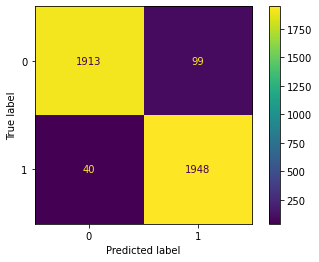

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = model_7.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

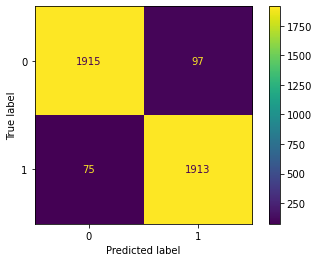

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred3 = LRmodel.predict(X_test)
cm = confusion_matrix(y_test, y_pred3)

cm_display = ConfusionMatrixDisplay(cm).plot()

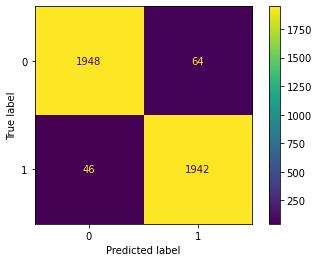

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_predxgb=xgb_cl.predict(X_test)
cm = confusion_matrix(y_test, y_predxgb)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
# import pickle
# pickle.dump(xgb_cl,open('/content/drive/MyDrive/word2vector/xgb.pkl','wb'))
# pickle.dump(SVCmodel,open('/content/drive/MyDrive/word2vector/svc','wb'))

In [ ]:
low='i am so happy'
# You cant just pray your depression or relationship problems away lol are u stupid

In [ ]:
low=low.lower()
print(low)

i am so happy


In [ ]:
# lower=[low]

In [ ]:
lower=pd.Series(low)
lower

0    i am so happy
dtype: object

In [ ]:
strr_x=lemmatize(lower)

Remaining no. of rows=  0


In [ ]:
type(strr_x)

pandas.core.series.Series

In [ ]:
#tokenizing
tokenizer=RegexpTokenizer(r'[A-Za-z]+')
lower = strr_x.apply(tokenizer.tokenize)
lower

0    [I, be, so, happy]
dtype: object

In [ ]:
from tqdm import tqdm
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(lower): # for each review/sentence
    vector = np.zeros(100) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence: # for each word in a review/sentence
        try:
            vector += word2vector[word]
            cnt_words += 1
        except:
          continue
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)
print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|██████████| 1/1 [00:00<00:00, 3847.99it/s]

1
100


In [ ]:
print(avg_w2v_vectors)

[array([-0.31849199,  0.37575999,  0.44874   , -0.58263001, -0.41630899,
        0.24344334, -0.16505667,  0.48057667,  0.05912067, -0.43333001,
        0.15881166,  0.30280332,  0.61981001, -0.29994767, -0.02979666,
       -0.53336   ,  0.05163533,  0.32739   , -0.38959667,  0.440861  ,
        0.39297001,  0.15973   ,  0.13128333, -0.16783333,  0.15389167,
        0.146419  , -0.20062733, -0.46103001,  0.12915234, -0.10924434,
       -0.155405  ,  0.64804667,  0.06242933, -0.04392633,  0.67667   ,
        0.32681967, -0.111279  ,  0.22990174, -0.13953334, -0.51393668,
       -0.19843866, -0.22488334,  0.2317846 , -0.46524   , -0.13893   ,
       -0.14318467,  0.33415567, -0.141706  ,  0.03721667, -1.10021667,
        0.039887  , -0.67000332,  0.37861667,  0.98819665, -0.32298333,
       -2.41030002,  0.07203666,  0.14845501,  1.52964667,  0.41374766,
       -0.078247  ,  1.02831666, -0.71347002, -0.109166  ,  0.92026667,
       -0.09975433,  0.69806667,  0.57309666, -0.06741633, -0.5

In [ ]:
inp=pd.DataFrame(avg_w2v_vectors)

In [ ]:
y_pred2 = svm.predict(inp)
y_predxgb=xgb_cl.predict(inp)
y_pred7 = model_7.predict(inp)

AttributeError: ignored

In [ ]:
y_pred7

In [ ]:
y_pred2

array([0])

In [ ]:
y_predxgb

array([0])

In [ ]:
pip install gradio

In [ ]:
import gradio as gr

In [ ]:
import os

In [ ]:
def preprocess(text):
  out=text.lower()
  out=pd.Series(out)
  tokenizer=RegexpTokenizer(r'[A-Za-z]+')
  lo = out.apply(tokenizer.tokenize)
  # Create Empty dictionary
  word2vector = {}
  # Create a dictionary with word and corresponding vector
  with open(os.path.join('/content/drive/MyDrive/word2vector/glove.6B.100d.txt')) as file:
    for line in file:
      list_of_values = line.split()    	
      word = list_of_values[0]
      vector_of_word = np.asarray(list_of_values[1:], dtype='float32')
      word2vector[word] = vector_of_word

  from tqdm import tqdm
  avg_w2v_vectorss = []; # the avg-w2v for each sentence/review is stored in this list
  for sentence in tqdm(lo): # for each review/sentence
      vector = np.zeros(100) # as word vectors are of zero length
      cnt_words =0; # num of words with a valid vector in the sentence/review
      for word in sentence: # for each word in a review/sentence
          try:
              vector += word2vector[word]
              cnt_words += 1
          except:
            continue
      if cnt_words != 0:
          vector /= cnt_words
      avg_w2v_vectorss.append(vector)
      print(avg_w2v_vectorss)
      #y_predxgb=xgb_cl.predict(avg_w2v_vectorss)
      y_pred2 = SVCmodel.predict(avg_w2v_vectorss)
      y_pred2=str(y_pred2)
      
  


In [ ]:
out_box=gr.outputs.Textbox()
gr.Interface(preprocess,"textbox",outputs=out_box).launch()